In [1]:
import argparse
import numpy as np
import time
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import os
import sys
from scipy import signal
import skinematics as skin
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
#from scipy import signal
from taskcaller import taskcaller
from taskcaller_train1 import taskcaller_train1
import random
# modularized library import
from train_test_split_k import train_test_split_k
from rms import rms    
from copy import copy
from datetime import datetime
from maml import *

from math import pi
from math import cos
from math import floor

In [2]:
dtype="float64"
tf.keras.backend.set_floatx(dtype)
print('Python version: ', sys.version)
print('Tensorflow version: ', tf.__version__)

Python version:  3.6.10 |Anaconda, Inc.| (default, May  7 2020, 19:46:08) [MSC v.1916 64 bit (AMD64)]
Tensorflow version:  2.2.0


## Import Dataset

In [3]:
S=30
# np.random.seed(S)
# random.seed(S)
# tf.random.set_seed(S)

system_rate = 60
k_train = 100
x_train1, t_train1, x_val1, t_val1,input_nm, target_nm, data_length, DELAY_SIZE, train_eule_data, anticipation_size, train_time_data = taskcaller_train1('../dataset/trainingtask1.csv', system_rate, k_train)
x_train2, t_train2, x_val2, t_val2,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask2.csv', system_rate, k_train)
x_train3, t_train3, x_val3, t_val3,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask3.csv', system_rate, k_train)
x_train4, t_train4, x_val4, t_val4, _, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask4.csv', system_rate, k_train)
x_train5, t_train5, x_val5, t_val5,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask5.csv', system_rate, k_train)
x_train6, t_train6, x_val6, t_val6,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask6.csv', system_rate, k_train)
x_train7, t_train7, x_val7, t_val7,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask7.csv', system_rate, k_train)
x_train8, t_train8, x_val8, t_val8,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask8.csv', system_rate, k_train)
x_train9, t_train9, x_val9, t_val9,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask9.csv', system_rate, k_train)
x_train10, t_train10, x_val10, t_val10,_, _, _, _, _, _, _ = taskcaller_train1('../dataset/trainingtask9.csv', system_rate, k_train)
#x_seq10, t_seq10, _, _,_, _, _, _, _, _, _ = taskcaller('trainingtask10.csv', system_rate, k)


traintaskx = [x_train1 , x_train2 , x_train3 , x_train4,x_train5,x_train6,x_train7,x_train8,x_train9,x_train10]
traintaskt = [t_train1 , t_train2 , t_train3 , t_train4,t_train5,t_train6,t_train7, t_train8, t_train9,t_train10]

valtaskx = [x_val1,x_val2,x_val3,x_val4,x_val5,x_val6,x_val7,x_val8,x_val9,x_val10]
valtaskt = [t_val1,t_val2,t_val3,t_val4,t_val5,t_val6,t_val7,t_val8,t_val9,t_val10]

numberoftask = len(traintaskx)

../dataset/trainingtask1.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask2.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask3.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask4.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask5.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask6.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask7.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask8.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask9.csv loaded...

Anticipation time: 300ms

../dataset/trainingtask9.csv loaded...

Anticipation time: 300ms



In [4]:
model1 = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(DELAY_SIZE, input_nm)),
        tf.keras.layers.Conv1D(27, DELAY_SIZE, activation=tf.nn.relu, input_shape=(DELAY_SIZE, input_nm), use_bias=True, 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(9, activation=tf.nn.relu, use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(target_nm, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        ])

In [5]:
model2 = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(DELAY_SIZE, input_nm)),
        tf.keras.layers.Conv1D(27, DELAY_SIZE, activation=tf.nn.relu, input_shape=(DELAY_SIZE, input_nm), use_bias=True, 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(9, activation=tf.nn.relu, use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(target_nm, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        ])

In [6]:
model3 = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(DELAY_SIZE, input_nm)),
        tf.keras.layers.Conv1D(27, DELAY_SIZE, activation=tf.nn.relu, input_shape=(DELAY_SIZE, input_nm), use_bias=True, 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(9, activation=tf.nn.relu, use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(target_nm, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        ])

In [7]:
model4 = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(DELAY_SIZE, input_nm)),
        tf.keras.layers.Conv1D(27, DELAY_SIZE, activation=tf.nn.relu, input_shape=(DELAY_SIZE, input_nm), use_bias=True, 
        kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(9, activation=tf.nn.relu, use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(target_nm, activation='linear', use_bias=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        ])

In [8]:
def update_procedure(model,dtx, dty, lr = 0.001, grad_step =10):
    optimizer = tf.keras.optimizers.Adam(learning_rate = lr)
    all_loss = []
    for step in range (grad_step):
        total_loss = 0
        for i in range(len(dtx)):
            with tf.GradientTape() as update:
                _,loss = model_func(model, dtx[i], dty[i])
            gradient = update.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradient, model.trainable_variables))
            total_loss+=loss
        all_loss.append(total_loss/len(dtx))
        print('Step{} : loss = {}'.format(step,total_loss/len(dtx)))
    return model, all_loss  

## Online MAML

In [9]:
#Online Meta Learning FTML
ftml = model1
threshold = 3.5
meta_step = 10
loss_ftml = []
total = []
all_eval_loss = []
all_train_loss = []
xtask_buffer = []
ttask_buffer = []
ftml_eval = []
ftml_time = []
buffer_length = len(xtask_buffer)
for i in range (10):
    print("Task ", i)
    eval_task = []
    train_loss = []
    start = time.time()
    if len(xtask_buffer) >= 15:
        xtask_buffer = xtask_buffer[5:]
        ttask_buffer = ttask_buffer[5:] 

    xtask_buffer = xtask_buffer[buffer_length//2:]
    ttask_buffer = ttask_buffer[buffer_length//2:]
    buffer_length = len(xtask_buffer)
    for j in range (8):
        
        total_loss_task = 0
        dtstream_x = traintaskx[i][0:j+1]
        dtstream_t = traintaskt[i][0:j+1]
        
        if len(xtask_buffer) <   1:
            dtrainx = dvalx = dtstream_x
            dtraint = dvalt = dtstream_t
        elif len(xtask_buffer) == 1:
            dtrainx = dvalx = xtask_buffer 
            dtraint = dvalt = ttask_buffer
        else :
            dtrainx = xtask_buffer[0:buffer_length//2]
            dvalx = xtask_buffer[buffer_length//2:]
            dtraint = ttask_buffer[0:buffer_length//2]
            dvalt = ttask_buffer[buffer_length//2:]

        print("Meta Update")
        ftml, loss = train_maml(ftml, meta_step, dtrainx, dtraint, dvalx, dvalt)
        total_loss_task += sum(loss)/len(loss)
        print("Update Procedure")
        ftml, loss = update_procedure(ftml,dtstream_x, dtstream_t)
        total_loss_task = (total_loss_task + sum(loss)/len(loss))/2

        tmp_loss = 0
        for k in range(len(valtaskx[i])):
            _, loss = model_func(ftml, valtaskx[i][k], valtaskt[i][k])
            tmp_loss+=loss

        eval_loss = tmp_loss/2
        eval_task.append(eval_loss)
        train_loss.append(total_loss_task)

        print('Data stream Batch- {} : loss = {}'.format(j,eval_loss))
        # if eval_loss < threshold or j == 9:
        #     print("Training Finish")
        #     total.append(j+1)
        #     loss_ftml.append(eval_loss)
        #     break
    curr = time.time() - start
    ftml_time.append(curr)
    start = time.time()
    xtask_buffer+=dtstream_x
    ttask_buffer+=dtstream_t
    ftml_eval.append(eval_loss)
    all_train_loss.append(train_loss)
    all_eval_loss.append(eval_task)


Task  0
Meta Update
Training is starting
Step 0 : loss = 6.9118475914001465
Step 1 : loss = 6.868464946746826
Step 2 : loss = 6.826265335083008
Step 3 : loss = 6.789239883422852
Step 4 : loss = 6.757127285003662
Step 5 : loss = 6.729119777679443
Step 6 : loss = 6.705536365509033
Step 7 : loss = 6.687667369842529
Step 8 : loss = 6.671644687652588
Step 9 : loss = 6.658306121826172
Update Procedure
Step0 : loss = 6.647201061248779
Step1 : loss = 6.63709831237793
Step2 : loss = 6.629209518432617
Step3 : loss = 6.621729850769043
Step4 : loss = 6.614981651306152
Step5 : loss = 6.608147144317627
Step6 : loss = 6.602490425109863
Step7 : loss = 6.596551895141602
Step8 : loss = 6.589155197143555
Step9 : loss = 6.578207969665527
Data stream Batch- 0 : loss = 4.736456871032715
Meta Update
Training is starting
Step 0 : loss = 7.002703666687012
Step 1 : loss = 6.98217248916626
Step 2 : loss = 6.959266185760498
Step 3 : loss = 6.9355340003967285
Step 4 : loss = 6.9124062061309814
Step 5 : loss = 6.88

Step2 : loss = 2.9385289351145425
Step3 : loss = 2.859994331995646
Step4 : loss = 2.7946608861287436
Step5 : loss = 2.7278809547424316
Step6 : loss = 2.6590718825658164
Step7 : loss = 2.593893806139628
Step8 : loss = 2.5390387376149497
Step9 : loss = 2.4884615739186606
Data stream Batch- 2 : loss = 9.8463773727417
Meta Update
Training is starting
Step 0 : loss = 0.5532121161619823
Step 1 : loss = 0.5233230839173
Step 2 : loss = 0.4961901704470317
Step 3 : loss = 0.47314226627349854
Step 4 : loss = 0.45195624728997547
Step 5 : loss = 0.4333111544450124
Step 6 : loss = 0.4172484278678894
Step 7 : loss = 0.4016483873128891
Step 8 : loss = 0.3879340638717016
Step 9 : loss = 0.37658679485321045
Update Procedure
Step0 : loss = 2.478792726993561
Step1 : loss = 2.319887727499008
Step2 : loss = 2.2814858853816986
Step3 : loss = 2.2195141911506653
Step4 : loss = 2.1628787219524384
Step5 : loss = 2.1181171536445618
Step6 : loss = 2.0774752497673035
Step7 : loss = 2.0415325462818146
Step8 : loss =

Step 0 : loss = 1.415524204572042
Step 1 : loss = 1.3741797308127084
Step 2 : loss = 1.3327240149180095
Step 3 : loss = 1.2920623620351155
Step 4 : loss = 1.2528864443302155
Step 5 : loss = 1.2144484917322795
Step 6 : loss = 1.1769693493843079
Step 7 : loss = 1.1394710888465245
Step 8 : loss = 1.1025882214307785
Step 9 : loss = 1.0662658860286076
Update Procedure
Step0 : loss = 2.2528564731280007
Step1 : loss = 1.780817836523056
Step2 : loss = 1.740190992752711
Step3 : loss = 1.6781607071558635
Step4 : loss = 1.5987667540709178
Step5 : loss = 1.5713670154412587
Step6 : loss = 1.5364126364390056
Step7 : loss = 1.495352069536845
Step8 : loss = 1.465311328570048
Step9 : loss = 1.4338157574335735
Data stream Batch- 5 : loss = 4.179133415222168
Meta Update
Training is starting
Step 0 : loss = 1.29486749569575
Step 1 : loss = 1.2522275547186534
Step 2 : loss = 1.2094635864098866
Step 3 : loss = 1.1673065920670826
Step 4 : loss = 1.1268933316071827
Step 5 : loss = 1.087208886941274
Step 6 : l

Step3 : loss = 2.007477104663849
Step4 : loss = 1.9627616964280605
Step5 : loss = 1.923008270561695
Step6 : loss = 1.894358802586794
Step7 : loss = 1.8624992370605469
Step8 : loss = 1.8324272222816944
Step9 : loss = 1.8048176690936089
Data stream Batch- 7 : loss = 2.004447340965271
Task  4
Meta Update
Training is starting
Step 0 : loss = 0.5208813299735386
Step 1 : loss = 0.4971851458152135
Step 2 : loss = 0.47111130257447564
Step 3 : loss = 0.44828926523526513
Step 4 : loss = 0.43174080550670624
Step 5 : loss = 0.41794824600219727
Step 6 : loss = 0.4029055337111155
Step 7 : loss = 0.3894504904747009
Step 8 : loss = 0.37790774305661523
Step 9 : loss = 0.3754652341206869
Update Procedure
Step0 : loss = 5.494576454162598
Step1 : loss = 5.259985446929932
Step2 : loss = 5.027349472045898
Step3 : loss = 4.796670436859131
Step4 : loss = 4.568168640136719
Step5 : loss = 4.341529846191406
Step6 : loss = 4.116988658905029
Step7 : loss = 3.894346237182617
Step8 : loss = 3.673665761947632
Step9 :

Step 2 : loss = 0.3503525604804357
Step 3 : loss = 0.32476169864336646
Step 4 : loss = 0.31506310403347015
Step 5 : loss = 0.3074928050239881
Step 6 : loss = 0.29760250449180603
Step 7 : loss = 0.293644517660141
Step 8 : loss = 0.2881425668795904
Step 9 : loss = 0.2875935137271881
Update Procedure
Step0 : loss = 2.105653921763102
Step1 : loss = 1.8393025894959767
Step2 : loss = 1.7430099944273632
Step3 : loss = 1.6760382155577342
Step4 : loss = 1.6165910164515178
Step5 : loss = 1.558611313501994
Step6 : loss = 1.4997470875581105
Step7 : loss = 1.4511239727338154
Step8 : loss = 1.4078187048435211
Step9 : loss = 1.3655992150306702
Data stream Batch- 2 : loss = 3.9254850149154663
Meta Update
Training is starting
Step 0 : loss = 0.4520253986120224
Step 1 : loss = 0.4152676910161972
Step 2 : loss = 0.38823936879634857
Step 3 : loss = 0.361503983537356
Step 4 : loss = 0.3385753085215887
Step 5 : loss = 0.32189445197582245
Step 6 : loss = 0.3101020579536756
Step 7 : loss = 0.2976759299635887


Step5 : loss = 0.42155485451221464
Step6 : loss = 0.40854636430740354
Step7 : loss = 0.3901830971240997
Step8 : loss = 0.3753568768501282
Step9 : loss = 0.35889473259449006
Data stream Batch- 4 : loss = 4.492969512939453
Meta Update
Training is starting
Step 0 : loss = 0.8023914098739624
Step 1 : loss = 0.7296604563792546
Step 2 : loss = 0.6638289218147595
Step 3 : loss = 0.6114687832693259
Step 4 : loss = 0.5735433076818784
Step 5 : loss = 0.5470559460421404
Step 6 : loss = 0.5315883482495943
Step 7 : loss = 0.5248010742167631
Step 8 : loss = 0.513948722432057
Step 9 : loss = 0.5087486989796162
Update Procedure
Step0 : loss = 1.0772892783085506
Step1 : loss = 0.9442990819613138
Step2 : loss = 0.8566634804010391
Step3 : loss = 0.7983955244223276
Step4 : loss = 0.7410966406265894
Step5 : loss = 0.707463319102923
Step6 : loss = 0.6781808336575826
Step7 : loss = 0.6494997416933378
Step8 : loss = 0.6270414938529333
Step9 : loss = 0.6096034497022629
Data stream Batch- 5 : loss = 4.498218774

Step 2 : loss = 0.5162591213981311
Step 3 : loss = 0.490052471558253
Step 4 : loss = 0.46512606491645175
Step 5 : loss = 0.4430040741960208
Step 6 : loss = 0.4290359765291214
Step 7 : loss = 0.41929182161887485
Step 8 : loss = 0.4124966114759445
Step 9 : loss = 0.4071425174673398
Update Procedure
Step0 : loss = 0.8511271104216576
Step1 : loss = 0.7119554579257965
Step2 : loss = 0.6461512520909309
Step3 : loss = 0.6317657344043255
Step4 : loss = 0.6094818133860826
Step5 : loss = 0.6048828065395355
Step6 : loss = 0.6011282950639725
Step7 : loss = 0.5990396589040756
Step8 : loss = 0.5955893974751234
Step9 : loss = 0.5990431327372789
Data stream Batch- 7 : loss = 1.4905532896518707
Task  8
Meta Update
Training is starting
Step 0 : loss = 0.3063114608327548
Step 1 : loss = 0.3036704435944557
Step 2 : loss = 0.30475982278585434
Step 3 : loss = 0.3040869211157163
Step 4 : loss = 0.30072443187236786
Step 5 : loss = 0.3027808368206024
Step 6 : loss = 0.298217477897803
Step 7 : loss = 0.30050285

Step 0 : loss = 1.3792745818694432
Step 1 : loss = 1.3407474781076114
Step 2 : loss = 1.3068543163438637
Step 3 : loss = 1.2754632234573364
Step 4 : loss = 1.247665969034036
Step 5 : loss = 1.221933012207349
Step 6 : loss = 1.1988320499658585
Step 7 : loss = 1.177115800480048
Step 8 : loss = 1.1566667755444844
Step 9 : loss = 1.1394511957963307
Update Procedure
Step0 : loss = 0.9216236273447672
Step1 : loss = 0.7418768405914307
Step2 : loss = 0.6107238332430521
Step3 : loss = 0.522461324930191
Step4 : loss = 0.4796841988960902
Step5 : loss = 0.459909791747729
Step6 : loss = 0.46500377853711444
Step7 : loss = 0.4461761663357417
Step8 : loss = 0.42263834923505783
Step9 : loss = 0.40436959515015286
Data stream Batch- 2 : loss = 1.828013002872467
Meta Update
Training is starting
Step 0 : loss = 1.3131802727778752
Step 1 : loss = 1.2895375117659569
Step 2 : loss = 1.263509064912796
Step 3 : loss = 1.2419398576021194
Step 4 : loss = 1.2138810430963833
Step 5 : loss = 1.1892154465119045
Step 

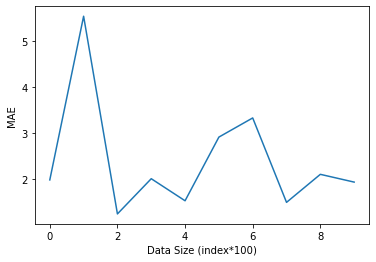

In [10]:
plt.figure(1)   
plt.plot(ftml_eval)
plt.xlabel('Data Size (index*100)')
plt.ylabel('MAE')
plt.show()

### TOE

In [11]:
xtask_buffer_toe = []
ttask_buffer_toe = []
optimizer_toe = tf.keras.optimizers.Adam(learning_rate = 0.001)
toe = model2
all_toe_eval = []
toe_res = []
toe_time = []
for i in range (10):
    print("Task ", i)
    toe_eval = []
    start = time.time()
    for j in range (8):
        xtask_buffer_toe.append(traintaskx[i][j])
        ttask_buffer_toe.append(traintaskt[i][j])
        print(len(xtask_buffer_toe))
            
        all_loss = []
        for step in range (20):
            total_loss = 0
            for k in range(len(xtask_buffer_toe)):
                with tf.GradientTape() as update:
                    _,loss = model_func(toe, xtask_buffer_toe[k], ttask_buffer_toe[k])
                gradient = update.gradient(loss, toe.trainable_variables)
                optimizer_toe.apply_gradients(zip(gradient, toe.trainable_variables))
                total_loss+=loss
            print('Step{} : loss = {}'.format(step,total_loss/len(xtask_buffer_toe)))
            
        tmp_loss = 0
        for k in range(len(valtaskx[i])):
            _, loss = model_func(toe, valtaskx[i][k], valtaskt[i][k])
            tmp_loss+=loss
        eval_loss = tmp_loss/2
        toe_eval.append(eval_loss)
        print('Data stream Batch- {} : loss = {}'.format(j,eval_loss))
    curr = time.time() - start
    toe_time.append(curr)
    toe_res.append(eval_loss)
    all_toe_eval.append(toe_eval)
        

Task  0
1
Step0 : loss = 6.8175764083862305
Step1 : loss = 6.788918972015381
Step2 : loss = 6.762638092041016
Step3 : loss = 6.737936973571777
Step4 : loss = 6.7153239250183105
Step5 : loss = 6.694769859313965
Step6 : loss = 6.677741527557373
Step7 : loss = 6.6642608642578125
Step8 : loss = 6.654611587524414
Step9 : loss = 6.647421836853027
Step10 : loss = 6.6417555809021
Step11 : loss = 6.63729190826416
Step12 : loss = 6.633739471435547
Step13 : loss = 6.63096809387207
Step14 : loss = 6.628546714782715
Step15 : loss = 6.626196384429932
Step16 : loss = 6.6239237785339355
Step17 : loss = 6.621609687805176
Step18 : loss = 6.619018077850342
Step19 : loss = 6.616174221038818
Data stream Batch- 0 : loss = 4.771427631378174
2
Step0 : loss = 7.040128469467163
Step1 : loss = 7.031245708465576
Step2 : loss = 7.02039909362793
Step3 : loss = 7.007654190063477
Step4 : loss = 6.994701147079468
Step5 : loss = 6.980743646621704
Step6 : loss = 6.965646505355835
Step7 : loss = 6.949224948883057
Step8 :

Step6 : loss = 0.8798339640100797
Step7 : loss = 0.8705126767357191
Step8 : loss = 0.8927653456727663
Step9 : loss = 0.8565835158030192
Step10 : loss = 0.8708130493760109
Step11 : loss = 0.8278725246588389
Step12 : loss = 0.8316357557972273
Step13 : loss = 0.8305474296212196
Step14 : loss = 0.8290481741229693
Step15 : loss = 0.8312362010280291
Step16 : loss = 0.8361374412973722
Step17 : loss = 0.8571897273262342
Step18 : loss = 0.8345526233315468
Step19 : loss = 0.8477942397197088
Data stream Batch- 3 : loss = 7.3988564014434814
13
Step0 : loss = 0.9602742493152618
Step1 : loss = 0.9729899855760428
Step2 : loss = 0.9564703152729914
Step3 : loss = 0.9690933273388789
Step4 : loss = 0.9531160730582017
Step5 : loss = 0.9771912831526536
Step6 : loss = 0.968205417578037
Step7 : loss = 0.9361020624637604
Step8 : loss = 0.9378320528910711
Step9 : loss = 0.9376911360483903
Step10 : loss = 0.9593172440162072
Step11 : loss = 0.9311114618411431
Step12 : loss = 0.9294008658482478
Step13 : loss = 0.

Step9 : loss = 0.830158232346825
Step10 : loss = 0.821253521286923
Step11 : loss = 0.81724853100984
Step12 : loss = 0.8118075365605562
Step13 : loss = 0.8270642666713052
Step14 : loss = 0.8096119787382043
Step15 : loss = 0.8329511543978816
Step16 : loss = 0.7986554516398389
Step17 : loss = 0.7914996807989867
Step18 : loss = 0.7778445780277252
Step19 : loss = 0.7837936644968779
Data stream Batch- 6 : loss = 1.3029996156692505
24
Step0 : loss = 0.7862182992200056
Step1 : loss = 0.8250835599998633
Step2 : loss = 0.8926844410598278
Step3 : loss = 0.8661184360583624
Step4 : loss = 0.864426658799251
Step5 : loss = 0.8602904689808687
Step6 : loss = 0.8356647168596586
Step7 : loss = 0.8911684180299441
Step8 : loss = 0.8266450377802054
Step9 : loss = 0.8564444407820702
Step10 : loss = 0.8161273275812467
Step11 : loss = 0.8695222437381744
Step12 : loss = 0.8310498856008053
Step13 : loss = 0.8402322555581728
Step14 : loss = 0.8046372979879379
Step15 : loss = 0.8463896575073401
Step16 : loss = 0.8

Step12 : loss = 1.2510154273580103
Step13 : loss = 1.2358173999716253
Step14 : loss = 1.269131352796274
Step15 : loss = 1.2372788278495563
Step16 : loss = 1.2318501481238533
Step17 : loss = 1.1886926100534552
Step18 : loss = 1.2030638447579216
Step19 : loss = 1.18919137032593
Data stream Batch- 1 : loss = 5.6039650440216064
35
Step0 : loss = 1.5524457258837563
Step1 : loss = 1.474828725201743
Step2 : loss = 1.465326419898442
Step3 : loss = 1.421529061453683
Step4 : loss = 1.4336020290851592
Step5 : loss = 1.4354230386870248
Step6 : loss = 1.4258125799042838
Step7 : loss = 1.446531386886324
Step8 : loss = 1.3852098958832877
Step9 : loss = 1.3963217760835376
Step10 : loss = 1.3767438352108001
Step11 : loss = 1.4071633790220532
Step12 : loss = 1.343545240163803
Step13 : loss = 1.3313545533588955
Step14 : loss = 1.357528553690229
Step15 : loss = 1.346868746621268
Step16 : loss = 1.3674727550574712
Step17 : loss = 1.310172700030463
Step18 : loss = 1.285278295619147
Step19 : loss = 1.3313890

Step15 : loss = 1.50527183148596
Step16 : loss = 1.5251796431011624
Step17 : loss = 1.6496527400281695
Step18 : loss = 1.5282228204939101
Step19 : loss = 1.4996136049429576
Data stream Batch- 4 : loss = 4.831927061080933
46
Step0 : loss = 1.6791158635979113
Step1 : loss = 1.629890210278656
Step2 : loss = 1.5385900191638782
Step3 : loss = 1.6908818250117095
Step4 : loss = 1.6175602493078813
Step5 : loss = 1.5546609921299892
Step6 : loss = 1.6235549935828084
Step7 : loss = 1.6116400795138401
Step8 : loss = 1.5419878836559213
Step9 : loss = 1.5580016083043555
Step10 : loss = 1.5706267013497974
Step11 : loss = 1.5169693795235262
Step12 : loss = 1.4938462421945904
Step13 : loss = 1.6183986644382062
Step14 : loss = 1.5813433735266975
Step15 : loss = 1.4895444952923318
Step16 : loss = 1.6695796465096266
Step17 : loss = 1.5449656196262525
Step18 : loss = 1.48568011690741
Step19 : loss = 1.565646489677222
Data stream Batch- 5 : loss = 4.717945575714111
47
Step0 : loss = 1.6691036509706618
Step1

Step18 : loss = 1.5122811772993632
Step19 : loss = 1.522290947181838
Data stream Batch- 7 : loss = 5.288277626037598
Task  7
57
Step0 : loss = 1.5071819037721867
Step1 : loss = 1.5089059409342314
Step2 : loss = 1.5568314581586604
Step3 : loss = 1.5354729530058409
Step4 : loss = 1.4970151175532425
Step5 : loss = 1.5262109266038526
Step6 : loss = 1.5302511098092062
Step7 : loss = 1.5285950355362474
Step8 : loss = 1.4948443127305884
Step9 : loss = 1.5489695793703984
Step10 : loss = 1.5565171989432551
Step11 : loss = 1.5635248521963756
Step12 : loss = 1.513431233272218
Step13 : loss = 1.5169736664546163
Step14 : loss = 1.5532604168381607
Step15 : loss = 1.5693377643300777
Step16 : loss = 1.5202975665268146
Step17 : loss = 1.5566846540099697
Step18 : loss = 1.5307134849983348
Step19 : loss = 1.565958123980907
Data stream Batch- 0 : loss = 6.04190731048584
58
Step0 : loss = 1.539926027943348
Step1 : loss = 1.5907924447594017
Step2 : loss = 1.5478939393471027
Step3 : loss = 1.5882316036471005

Step0 : loss = 1.6338994577527046
Step1 : loss = 1.6931641794302885
Step2 : loss = 1.6160207868498915
Step3 : loss = 1.6627184945870848
Step4 : loss = 1.6041647717356682
Step5 : loss = 1.6389520711758558
Step6 : loss = 1.600024695343831
Step7 : loss = 1.630914787597516
Step8 : loss = 1.5885690853876226
Step9 : loss = 1.6347207378815203
Step10 : loss = 1.5825634837588842
Step11 : loss = 1.6289188200060059
Step12 : loss = 1.5814207485493492
Step13 : loss = 1.6194509316016645
Step14 : loss = 1.564578178612625
Step15 : loss = 1.6121806042159306
Step16 : loss = 1.5496067203143065
Step17 : loss = 1.6076686209177269
Step18 : loss = 1.5569435682366877
Step19 : loss = 1.617536039694267
Data stream Batch- 3 : loss = 3.3799335956573486
69
Step0 : loss = 1.5681087439474852
Step1 : loss = 1.6427024522985236
Step2 : loss = 1.584749493478001
Step3 : loss = 1.5636739843133567
Step4 : loss = 1.5772725013287172
Step5 : loss = 1.570820430914561
Step6 : loss = 1.5570315386074176
Step7 : loss = 1.550740333

Step3 : loss = 1.3842463429215588
Step4 : loss = 1.3864099779461003
Step5 : loss = 1.377949626951278
Step6 : loss = 1.381008724245844
Step7 : loss = 1.3843144704646702
Step8 : loss = 1.408097975238969
Step9 : loss = 1.3831066632572608
Step10 : loss = 1.4317110018639625
Step11 : loss = 1.3945152665240854
Step12 : loss = 1.3823293040070352
Step13 : loss = 1.3800265900319135
Step14 : loss = 1.3870707133525535
Step15 : loss = 1.3821208986300457
Step16 : loss = 1.370327814658986
Step17 : loss = 1.373085641785513
Step18 : loss = 1.3733521315115917
Step19 : loss = 1.3762006948265848
Data stream Batch- 6 : loss = 2.431457281112671
80
Step0 : loss = 1.3942132556810976
Step1 : loss = 1.4109265392646193
Step2 : loss = 1.4058448603376745
Step3 : loss = 1.4040991105139256
Step4 : loss = 1.3947134401649237
Step5 : loss = 1.3971681907773017
Step6 : loss = 1.4257025249302386
Step7 : loss = 1.404596085473895
Step8 : loss = 1.40594147965312
Step9 : loss = 1.4048404760658741
Step10 : loss = 1.38499564714

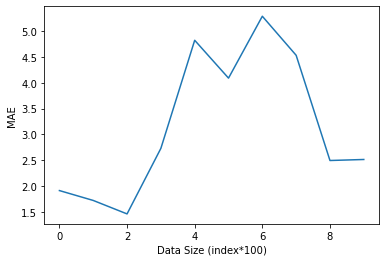

In [12]:
# plt.figure(2)   
# plt.title("MAE (Training)")   
# for item in all_toe_eval:
#     plt.plot(item)
# plt.legend(["Task 1", "Task 2","Task 3","Task 4","Task 5","Task 6","Task 7","Task 8","Task 9","Task 10"], loc=(1.05, 0.5))
# plt.xlabel('Data Size (index*100)')
# plt.ylabel('MAE')
# plt.show()

plt.figure(1)   
plt.plot(toe_res)
plt.xlabel('Data Size (index*100)')
plt.ylabel('MAE')
plt.show()

## JT

In [13]:
xtask_buffer_jt= []
ttask_buffer_jt = []
optimizer_jt = tf.keras.optimizers.Adam(learning_rate = 0.001)
jt = model3
all_jt_eval = []
jt_res = []
jt_time = []
for i in range (10):
    print("Task ", i)
    eval_task = []
    train_loss = []
    jt_eval = []
    start = time.time()
    for j in range (8):
        dtstream_x = traintaskx[i][0:j+1]
        dtstream_t = traintaskt[i][0:j+1]
        for step in range (20):
            total_loss = 0
            for k in range(len(dtstream_x)):
                with tf.GradientTape() as update:
                    _,loss = model_func(jt, dtstream_x, dtstream_t)
                gradient = update.gradient(loss, jt.trainable_variables)
                optimizer_jt.apply_gradients(zip(gradient, jt.trainable_variables))
                total_loss+=loss
            print('Step{} : loss = {}'.format(step,total_loss/len(dtstream_x)))
        tmp_loss = 0
        for k in range(len(valtaskx[i])):
            _, loss = model_func(jt, valtaskx[i][k], valtaskt[i][k])
            tmp_loss+=loss
        eval_loss = tmp_loss/2
        jt_eval.append(eval_loss)
        print('Data stream Batch- {} : loss = {}'.format(j,eval_loss))
    curr = time.time() - start
    jt_time.append(curr)
    all_jt_eval.append(jt_eval)
    jt_res.append(eval_loss)

Task  0
Step0 : loss = 6.752508163452148
Step1 : loss = 6.698731899261475
Step2 : loss = 6.6448655128479
Step3 : loss = 6.591222763061523
Step4 : loss = 6.538035869598389
Step5 : loss = 6.485889434814453
Step6 : loss = 6.434367656707764
Step7 : loss = 6.384064197540283
Step8 : loss = 6.336270332336426
Step9 : loss = 6.2906270027160645
Step10 : loss = 6.248487949371338
Step11 : loss = 6.210700035095215
Step12 : loss = 6.174905776977539
Step13 : loss = 6.138688564300537
Step14 : loss = 6.101132392883301
Step15 : loss = 6.062375545501709
Step16 : loss = 6.022190570831299
Step17 : loss = 5.980867862701416
Step18 : loss = 5.938525199890137
Step19 : loss = 5.8953986167907715
Data stream Batch- 0 : loss = 4.687814950942993
Step0 : loss = 6.246601581573486
Step1 : loss = 6.15592622756958
Step2 : loss = 6.061849355697632
Step3 : loss = 5.9644615650177
Step4 : loss = 5.862358093261719
Step5 : loss = 5.755520820617676
Step6 : loss = 5.644115686416626
Step7 : loss = 5.528145790100098
Step8 : loss 

Step9 : loss = 2.337582290172577
Step10 : loss = 2.3352495431900024
Step11 : loss = 2.3334534764289856
Step12 : loss = 2.3316152095794678
Step13 : loss = 2.3299542665481567
Step14 : loss = 2.328537344932556
Step15 : loss = 2.327316164970398
Step16 : loss = 2.326234459877014
Step17 : loss = 2.3252642154693604
Step18 : loss = 2.324397027492523
Step19 : loss = 2.3235650062561035
Data stream Batch- 3 : loss = 12.976125717163086
Step0 : loss = 2.7213306427001953
Step1 : loss = 2.6957805156707764
Step2 : loss = 2.6905156135559083
Step3 : loss = 2.6829144954681396
Step4 : loss = 2.67645902633667
Step5 : loss = 2.673193836212158
Step6 : loss = 2.668415832519531
Step7 : loss = 2.6645628929138185
Step8 : loss = 2.661979055404663
Step9 : loss = 2.659649705886841
Step10 : loss = 2.657822608947754
Step11 : loss = 2.6562875270843507
Step12 : loss = 2.6549753189086913
Step13 : loss = 2.653772783279419
Step14 : loss = 2.6526159286499023
Step15 : loss = 2.6515296459198
Step16 : loss = 2.650497579574585

Step17 : loss = 5.4702324867248535
Step18 : loss = 5.470065253121512
Step19 : loss = 5.469898632594517
Data stream Batch- 6 : loss = 5.892197847366333
Step0 : loss = 6.256406664848328
Step1 : loss = 6.242653787136078
Step2 : loss = 6.238924741744995
Step3 : loss = 6.23914247751236
Step4 : loss = 6.238441050052643
Step5 : loss = 6.238158404827118
Step6 : loss = 6.238036394119263
Step7 : loss = 6.237859129905701
Step8 : loss = 6.237760841846466
Step9 : loss = 6.237673103809357
Step10 : loss = 6.237584114074707
Step11 : loss = 6.237494051456451
Step12 : loss = 6.237403094768524
Step13 : loss = 6.2373098731040955
Step14 : loss = 6.237223207950592
Step15 : loss = 6.237145721912384
Step16 : loss = 6.237073183059692
Step17 : loss = 6.237004220485687
Step18 : loss = 6.236940860748291
Step19 : loss = 6.236881196498871
Data stream Batch- 7 : loss = 5.885458469390869
Task  3
Step0 : loss = 14.87176513671875
Step1 : loss = 14.7474365234375
Step2 : loss = 14.559776306152344
Step3 : loss = 14.326638

Step8 : loss = 4.622525215148926
Step9 : loss = 4.62039311726888
Step10 : loss = 4.618117332458496
Step11 : loss = 4.616323630015056
Step12 : loss = 4.615221341451009
Step13 : loss = 4.614090760548909
Step14 : loss = 4.613238016764323
Step15 : loss = 4.612576166788737
Step16 : loss = 4.611978848775228
Step17 : loss = 4.611578305562337
Step18 : loss = 4.61112642288208
Step19 : loss = 4.610613822937012
Data stream Batch- 2 : loss = 13.5863618850708
Step0 : loss = 8.333806276321411
Step1 : loss = 8.32450532913208
Step2 : loss = 8.313976049423218
Step3 : loss = 8.30098557472229
Step4 : loss = 8.289145708084106
Step5 : loss = 8.277939081192017
Step6 : loss = 8.268710374832153
Step7 : loss = 8.260441780090332
Step8 : loss = 8.253894329071045
Step9 : loss = 8.24807333946228
Step10 : loss = 8.242951393127441
Step11 : loss = 8.23803997039795
Step12 : loss = 8.233243465423584
Step13 : loss = 8.228490591049194
Step14 : loss = 8.224026679992676
Step15 : loss = 8.219903469085693
Step16 : loss = 8.2

Step19 : loss = 6.78512708346049
Data stream Batch- 5 : loss = 12.670625686645508
Step0 : loss = 6.76202780859811
Step1 : loss = 6.7129075186593195
Step2 : loss = 6.669012478419712
Step3 : loss = 6.640890734536307
Step4 : loss = 6.617860998426165
Step5 : loss = 6.5944158009120395
Step6 : loss = 6.572545119694301
Step7 : loss = 6.553903102874756
Step8 : loss = 6.535852704729352
Step9 : loss = 6.519109180995396
Step10 : loss = 6.504833221435547
Step11 : loss = 6.494777747562954
Step12 : loss = 6.48816408429827
Step13 : loss = 6.4829021862574985
Step14 : loss = 6.4785237312316895
Step15 : loss = 6.475124154772077
Step16 : loss = 6.4722200121198386
Step17 : loss = 6.46983528137207
Step18 : loss = 6.46758999143328
Step19 : loss = 6.465522153036935
Data stream Batch- 6 : loss = 10.47674036026001
Step0 : loss = 6.588863372802734
Step1 : loss = 6.55405205488205
Step2 : loss = 6.519974768161774
Step3 : loss = 6.490102469921112
Step4 : loss = 6.4654762744903564
Step5 : loss = 6.446120858192444
S

Step15 : loss = 1.4011161923408508
Step16 : loss = 1.3898594379425049
Step17 : loss = 1.3591874837875366
Step18 : loss = 1.3227267265319824
Step19 : loss = 1.3036980032920837
Data stream Batch- 1 : loss = 12.049078941345215
Step0 : loss = 2.0850112438201904
Step1 : loss = 2.010984778404236
Step2 : loss = 1.9730462630589802
Step3 : loss = 1.9702611366907756
Step4 : loss = 1.9580496946970622
Step5 : loss = 1.9438178936640422
Step6 : loss = 1.9479494094848633
Step7 : loss = 1.95077649752299
Step8 : loss = 1.942288875579834
Step9 : loss = 1.9346420367558796
Step10 : loss = 1.9310283660888672
Step11 : loss = 1.927880883216858
Step12 : loss = 1.926922599474589
Step13 : loss = 1.9270392258961995
Step14 : loss = 1.9251314401626587
Step15 : loss = 1.923527201016744
Step16 : loss = 1.9222623904546101
Step17 : loss = 1.9207804600397747
Step18 : loss = 1.9201011260350545
Step19 : loss = 1.9194375276565552
Data stream Batch- 2 : loss = 11.990540027618408
Step0 : loss = 2.0918359756469727
Step1 : lo

Step1 : loss = 7.145474990208943
Step2 : loss = 7.139846007029216
Step3 : loss = 7.134159882863362
Step4 : loss = 7.130116065343221
Step5 : loss = 7.127458810806274
Step6 : loss = 7.125093380610148
Step7 : loss = 7.123486757278442
Step8 : loss = 7.122069199879964
Step9 : loss = 7.120884497960408
Step10 : loss = 7.119781096776326
Step11 : loss = 7.1187229951222735
Step12 : loss = 7.1178193887074785
Step13 : loss = 7.117168188095093
Step14 : loss = 7.116694688796997
Step15 : loss = 7.1163004239400225
Step16 : loss = 7.115906318028768
Step17 : loss = 7.115569988886516
Step18 : loss = 7.115269899368286
Step19 : loss = 7.114997227986653
Data stream Batch- 5 : loss = 4.155170679092407
Step0 : loss = 7.503228323800223
Step1 : loss = 7.490178789411273
Step2 : loss = 7.485177176339286
Step3 : loss = 7.479645933423724
Step4 : loss = 7.475217682974679
Step5 : loss = 7.471484116145542
Step6 : loss = 7.467884336199079
Step7 : loss = 7.464732783181327
Step8 : loss = 7.462003571646554
Step9 : loss = 

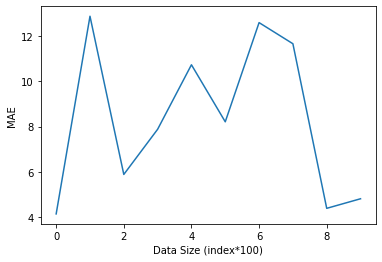

In [14]:
# plt.figure(2)   
# plt.title("MAE (eval)")   
# for item in all_jt_eval:
#     plt.plot(item)
# plt.legend(["Task 1", "Task 2","Task 3","Task 4","Task 5","Task 6","Task 7","Task 8","Task 9","Task 10"], loc=(1.05, 0.5))
# plt.xlabel('Data Size (index*100)')
# plt.ylabel('MAE')
# plt.show()

z

## Scratch

In [15]:
xtask_buffer_sc= []
ttask_buffer_sc = []
optimizer_sc = tf.keras.optimizers.Adam(learning_rate = 0.001)
all_sc_eval = []
sc_res = []
sc_time= []
for i in range (10):
    print("Task ", i)
    eval_task = []
    train_loss = []
    sc_eval = []
    sc = model4
    start = time.time()
    for j in range (8):
        dtstream_x = traintaskx[i][0:j+1]
        dtstream_t = traintaskt[i][0:j+1]
        for step in range (20):
            total_loss = 0
            for k in range(len(dtstream_x)):
                with tf.GradientTape() as update:
                    _,loss = model_func(sc, dtstream_x, dtstream_t)
                gradient = update.gradient(loss, sc.trainable_variables)
                optimizer_sc.apply_gradients(zip(gradient, sc.trainable_variables))
                total_loss+=loss
            print('Step{} : loss = {}'.format(step,total_loss/len(dtstream_x)))
        tmp_loss = 0
        for k in range(len(valtaskx[i])):
            _, loss = model_func(sc, valtaskx[i][k], valtaskt[i][k])
            tmp_loss+=loss
        eval_loss = tmp_loss/2
        sc_eval.append(eval_loss)
        print('Data stream Batch- {} : loss = {}'.format(j,eval_loss))
    curr = time.time() - start
    sc_time.append(curr)
    all_sc_eval.append(sc_eval)
    sc_res.append(eval_loss)

Task  0
Step0 : loss = 6.720779895782471
Step1 : loss = 6.693767070770264
Step2 : loss = 6.669704437255859
Step3 : loss = 6.6475677490234375
Step4 : loss = 6.626093864440918
Step5 : loss = 6.605418682098389
Step6 : loss = 6.584721565246582
Step7 : loss = 6.563686370849609
Step8 : loss = 6.542329788208008
Step9 : loss = 6.520183086395264
Step10 : loss = 6.497946262359619
Step11 : loss = 6.476111888885498
Step12 : loss = 6.454684257507324
Step13 : loss = 6.433165073394775
Step14 : loss = 6.411568641662598
Step15 : loss = 6.38999080657959
Step16 : loss = 6.368417739868164
Step17 : loss = 6.346689224243164
Step18 : loss = 6.324660778045654
Step19 : loss = 6.3019890785217285
Data stream Batch- 0 : loss = 4.709965705871582
Step0 : loss = 6.6877264976501465
Step1 : loss = 6.6377856731414795
Step2 : loss = 6.5832436084747314
Step3 : loss = 6.5244176387786865
Step4 : loss = 6.460718870162964
Step5 : loss = 6.390773773193359
Step6 : loss = 6.314762592315674
Step7 : loss = 6.232809543609619
Step8

Step11 : loss = 2.3429142236709595
Step12 : loss = 2.3412492275238037
Step13 : loss = 2.339644193649292
Step14 : loss = 2.3381059169769287
Step15 : loss = 2.336603105068207
Step16 : loss = 2.3351247310638428
Step17 : loss = 2.333642065525055
Step18 : loss = 2.332198679447174
Step19 : loss = 2.3308087587356567
Data stream Batch- 3 : loss = 13.094930171966553
Step0 : loss = 2.7551239490509034
Step1 : loss = 2.7312223434448244
Step2 : loss = 2.708188772201538
Step3 : loss = 2.6958584785461426
Step4 : loss = 2.688663387298584
Step5 : loss = 2.683541774749756
Step6 : loss = 2.680975818634033
Step7 : loss = 2.67918119430542
Step8 : loss = 2.6768679141998293
Step9 : loss = 2.674404191970825
Step10 : loss = 2.6721354961395263
Step11 : loss = 2.670238208770752
Step12 : loss = 2.6685113430023195
Step13 : loss = 2.6668591022491457
Step14 : loss = 2.665310859680176
Step15 : loss = 2.6638508796691895
Step16 : loss = 2.6624648571014404
Step17 : loss = 2.6611180305480957
Step18 : loss = 2.65981311798

Step2 : loss = 6.2372371554374695
Step3 : loss = 6.236739456653595
Step4 : loss = 6.236364006996155
Step5 : loss = 6.2358927726745605
Step6 : loss = 6.235602855682373
Step7 : loss = 6.235479891300201
Step8 : loss = 6.235349535942078
Step9 : loss = 6.235232412815094
Step10 : loss = 6.23512727022171
Step11 : loss = 6.235037326812744
Step12 : loss = 6.234949946403503
Step13 : loss = 6.234871923923492
Step14 : loss = 6.2348132729530334
Step15 : loss = 6.234758079051971
Step16 : loss = 6.234707176685333
Step17 : loss = 6.234666228294373
Step18 : loss = 6.234627604484558
Step19 : loss = 6.234592080116272
Data stream Batch- 7 : loss = 5.172319412231445
Task  3
Step0 : loss = 15.35722541809082
Step1 : loss = 15.045236587524414
Step2 : loss = 14.620774269104004
Step3 : loss = 14.153155326843262
Step4 : loss = 13.688228607177734
Step5 : loss = 13.296058654785156
Step6 : loss = 12.889742851257324
Step7 : loss = 12.444391250610352
Step8 : loss = 11.983062744140625
Step9 : loss = 11.496135711669922

Step15 : loss = 4.555970350901286
Step16 : loss = 4.551915168762207
Step17 : loss = 4.5474443435668945
Step18 : loss = 4.543242931365967
Step19 : loss = 4.53924576441447
Data stream Batch- 2 : loss = 14.133516311645508
Step0 : loss = 8.216615915298462
Step1 : loss = 8.206887006759644
Step2 : loss = 8.197130918502808
Step3 : loss = 8.186429738998413
Step4 : loss = 8.177361249923706
Step5 : loss = 8.169214487075806
Step6 : loss = 8.163182020187378
Step7 : loss = 8.158607006072998
Step8 : loss = 8.155196189880371
Step9 : loss = 8.153494119644165
Step10 : loss = 8.152207851409912
Step11 : loss = 8.151071071624756
Step12 : loss = 8.150079727172852
Step13 : loss = 8.149181365966797
Step14 : loss = 8.148282766342163
Step15 : loss = 8.147472143173218
Step16 : loss = 8.1467764377594
Step17 : loss = 8.146135568618774
Step18 : loss = 8.145490646362305
Step19 : loss = 8.144888639450073
Data stream Batch- 3 : loss = 14.032396793365479
Step0 : loss = 10.692877006530761
Step1 : loss = 10.660555458068

Step2 : loss = 6.651287691933768
Step3 : loss = 6.609478201184954
Step4 : loss = 6.571595668792725
Step5 : loss = 6.538423470088413
Step6 : loss = 6.51399953024728
Step7 : loss = 6.498852866036551
Step8 : loss = 6.487687860216413
Step9 : loss = 6.478612150464739
Step10 : loss = 6.47053473336356
Step11 : loss = 6.463288239070347
Step12 : loss = 6.457182679857526
Step13 : loss = 6.452216897691999
Step14 : loss = 6.447793551853725
Step15 : loss = 6.44427353995187
Step16 : loss = 6.441156319209507
Step17 : loss = 6.4382564680916925
Step18 : loss = 6.435745784214565
Step19 : loss = 6.433451788766043
Data stream Batch- 6 : loss = 10.55863094329834
Step0 : loss = 6.545941412448883
Step1 : loss = 6.51313591003418
Step2 : loss = 6.481420040130615
Step3 : loss = 6.454623639583588
Step4 : loss = 6.433459460735321
Step5 : loss = 6.416795253753662
Step6 : loss = 6.4053367376327515
Step7 : loss = 6.398065268993378
Step8 : loss = 6.393555521965027
Step9 : loss = 6.391127824783325
Step10 : loss = 6.38

Step9 : loss = 1.3646833896636963
Step10 : loss = 1.3646117448806763
Step11 : loss = 1.338730275630951
Step12 : loss = 1.3449957370758057
Step13 : loss = 1.337658166885376
Step14 : loss = 1.3292701244354248
Step15 : loss = 1.3182982802391052
Step16 : loss = 1.30519038438797
Step17 : loss = 1.2938801646232605
Step18 : loss = 1.2854628562927246
Step19 : loss = 1.28132164478302
Data stream Batch- 1 : loss = 9.834195137023926
Step0 : loss = 2.0504539807637534
Step1 : loss = 2.0302863121032715
Step2 : loss = 2.011639674504598
Step3 : loss = 1.9901221990585327
Step4 : loss = 1.9667056401570637
Step5 : loss = 1.9459646542867024
Step6 : loss = 1.9278781811396282
Step7 : loss = 1.923412521680196
Step8 : loss = 1.9256569147109985
Step9 : loss = 1.9243677854537964
Step10 : loss = 1.9203219413757324
Step11 : loss = 1.9149576822916667
Step12 : loss = 1.90902046362559
Step13 : loss = 1.9056559006373088
Step14 : loss = 1.9040335416793823
Step15 : loss = 1.90123184521993
Step16 : loss = 1.897483825683

Step19 : loss = 3.202827787399292
Data stream Batch- 4 : loss = 5.273216009140015
Step0 : loss = 7.151082118352254
Step1 : loss = 7.136572202046712
Step2 : loss = 7.134233315785726
Step3 : loss = 7.12951119740804
Step4 : loss = 7.126826127370198
Step5 : loss = 7.125666220982869
Step6 : loss = 7.123944441477458
Step7 : loss = 7.123109420140584
Step8 : loss = 7.1221338113149
Step9 : loss = 7.12132453918457
Step10 : loss = 7.120561679204305
Step11 : loss = 7.119894663492839
Step12 : loss = 7.119246164957683
Step13 : loss = 7.118664582570394
Step14 : loss = 7.1181862354278564
Step15 : loss = 7.117793480555217
Step16 : loss = 7.117447694142659
Step17 : loss = 7.117095470428467
Step18 : loss = 7.116754452387492
Step19 : loss = 7.116441567738851
Data stream Batch- 5 : loss = 5.139600992202759
Step0 : loss = 7.50961514881679
Step1 : loss = 7.487126077924456
Step2 : loss = 7.471717493874686
Step3 : loss = 7.460051400320871
Step4 : loss = 7.451677867344448
Step5 : loss = 7.445037909916469
Step6 

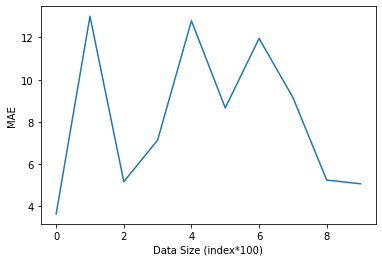

In [16]:
plt.figure(1)   
plt.plot(sc_res)
plt.xlabel('Data Size (index*100)')
plt.ylabel('MAE')
plt.show()

In [17]:
len(valtaskx[0])

2

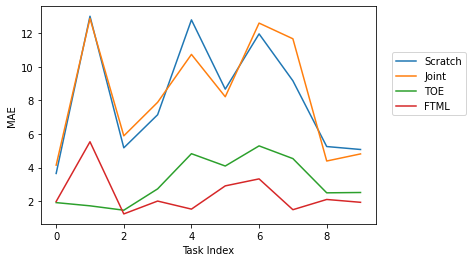

In [18]:
plt.figure(1)   
plt.plot(sc_res)
plt.plot(jt_res)
plt.plot(toe_res)
plt.plot(ftml_eval)

plt.legend(["Scratch", "Joint", "TOE", "FTML"], loc=(1.05, 0.5))
plt.xlabel('Task Index')
plt.ylabel('MAE')
plt.show()

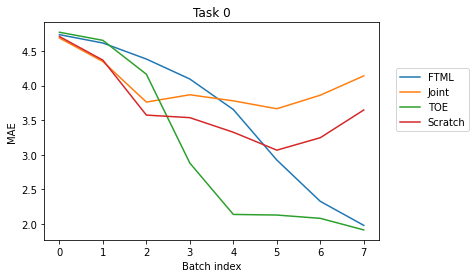

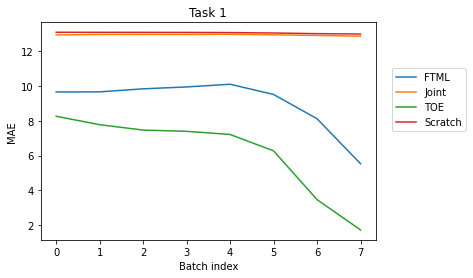

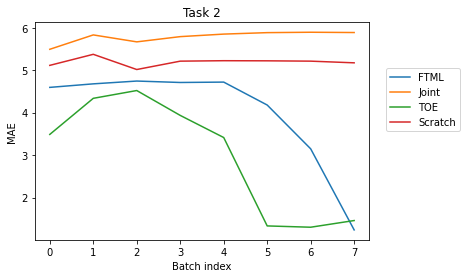

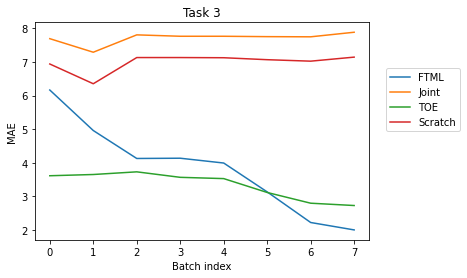

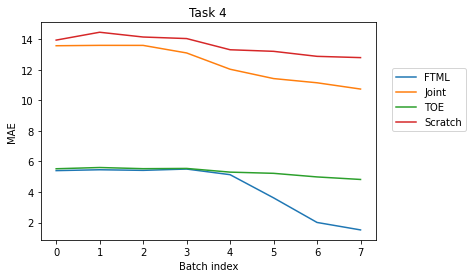

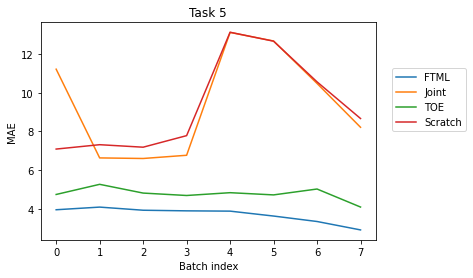

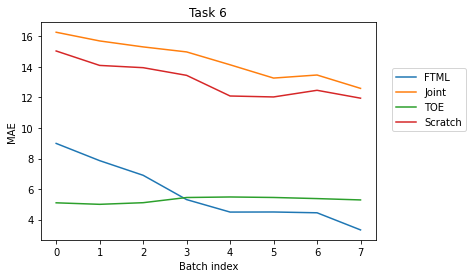

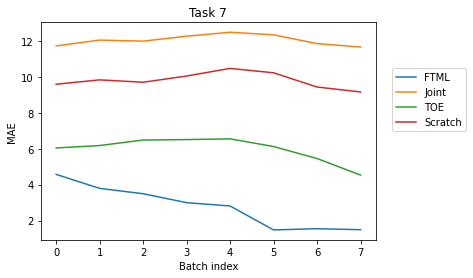

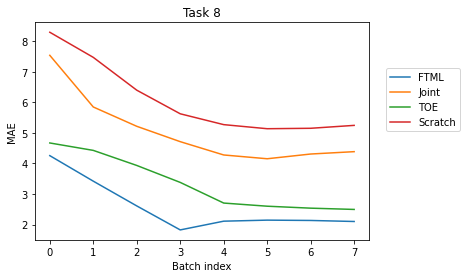

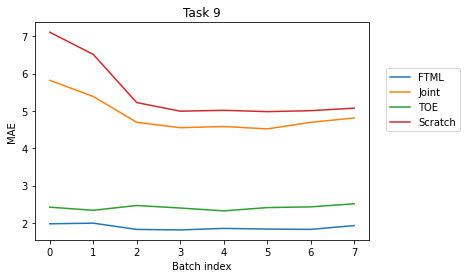

In [19]:
for i in range(10):
    plt.title("Task "+ str(i))
    plt.plot(all_eval_loss[i])
    plt.plot(all_jt_eval[i])
    plt.plot(all_toe_eval[i])
    plt.plot(all_sc_eval[i])

    plt.legend(["FTML", "Joint", "TOE", "Scratch"], loc=(1.05, 0.5))
    plt.xlabel('Batch index')
    plt.ylabel('MAE')
    plt.show()

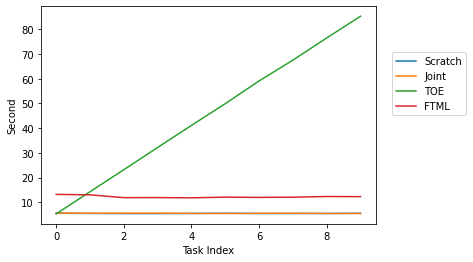

In [22]:
plt.figure(1)   
plt.plot(sc_time)
plt.plot(jt_time)
plt.plot(toe_time)
plt.plot(ftml_time)

plt.legend(["Scratch", "Joint", "TOE", "FTML"], loc=(1.05, 0.5))
plt.xlabel('Task Index')
plt.ylabel('Second')
plt.show()

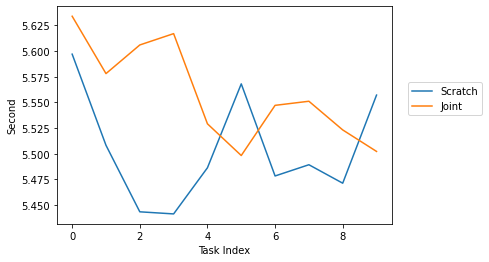

In [23]:
plt.figure(1)   
plt.plot(sc_time)
plt.plot(jt_time)


plt.legend(["Scratch", "Joint"], loc=(1.05, 0.5))
plt.xlabel('Task Index')
plt.ylabel('Second')
plt.show()